,byggeår,Totalt energiforbruk (kWh) 2012 Elektrisitet
0,Før 1931,16909
1,1931-1954,16254
2,1955-1970,14973
3,1971-1986,16744
4,1987-1996,16539
5,1997 og senere,15470


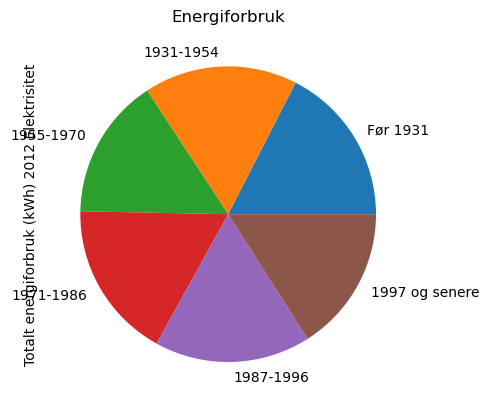

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SSBENC = "ISO-8859-1" #Tegnkodingen brukt i csv-filer av ssb

#leser inn datafil
#encoding = tegnkoding, sep= separtoren brukt i filen, header = hvor data starter (teller linjer fra 0 og hopper over tomme linjer
df = pd.read_csv("elektristet_bygning.csv", encoding="ISO-8859-1", sep=";", header=1) 

#Plotter innhold i totalt energifrobruk i kakediagram, labels fra "byggeår" kolonne, ingen legend
df.plot.pie(y="Totalt energiforbruk (kWh) 2012 Elektrisitet", labels=df["byggeår"], legend=False)
plt.title("Energiforbruk")
df

In [111]:

#Leser inn dataset 14320 (med alt valgt) tabulatorseparert uten overskrift
dft = pd.read_csv("tidsbrukundersokelse.csv", encoding=SSBENC, sep="\t")

#Skjekker innholdet av kolonner for å få oversikt
print(dft["statistikkvariabel"].unique()) #unique gir de unike verdiene i kolonnen
print(dft["aktivitet"].unique())


#Bytte rut celler med .. (ssb sin versjon av "mangler data") til np.nan pandas sin representasjon av mangler data
dft = dft.replace("..", np.nan)

#Flytter kolonner ned som rader
#-- vi beholder alle kolonnene i id_vars og henter alle andre ned i en kolonne "årstall" og en verdikolonne "antall"
dft = dft.melt(id_vars=["statistikkvariabel", "aktivitet", "kjønn", "alder"], var_name="Årstall", value_name="antall")

#Skifter datatype på kolonne "antall" til flyttal
dft = dft.astype({"antall": "float64"})
#Skifter datatype til årene til PeriodIndex med frekvens "Year" (Y)
dft["Årstall"] = pd.PeriodIndex(dft["Årstall"], freq="Y")

#Filtrerer ut data, kun alder 16-74
dft = dft.query("alder == '16-74 år'")

#Lager liste med aktivitetene vi vil beholde
aktiviteter = ['1 Inntektsgivende arbeid, arbeidsreiser mv.','3 Utdanning','5 Fritid']
#filtrerer på disse aktivitetene
dft = dft.query("aktivitet in @aktiviteter")

#Alternativ måte:
"""
dft = dft[dft["aktivitet"].str.contains('1') | 
        dft["aktivitet"].str.contains('2') | 
        dft["aktivitet"].str.contains('3')]
"""

#Filtrerer ut på kjønn == begge kjønn
dft = dft.query("kjønn == 'Begge kjønn'")

#Dropper kolonner vi ikke lenger trenger
dft = dft.drop(columns=["kjønn", "alder"])

#Lager pivottabell:
# Vi vil ha aktivitet/statistikkvariabel som index, og årstallene som kolonner
dft = dft.pivot(index=["aktivitet","statistikkvariabel"], columns="Årstall", values="antall")

#Fjern rader som inneholder manglende data
dft = dft.dropna(axis=0)
dft

['Tid brukt, blant alle (timer og minutter)'
 'Tid brukt, blant de som utførte aktiviteten (timer og minutter)'
 'Andel som utførte aktiviteten (prosent)' 'Antall svar']
['_A I alt' '1 Inntektsgivende arbeid, arbeidsreiser mv.'
 '2 Husholdsarbeid' '3 Utdanning' '4 Personlige behov' '5 Fritid'
 '9 Annet, uoppgitt']


Årstall                                                                                          1970  \
aktivitet                                   statistikkvariabel                                          
1 Inntektsgivende arbeid, arbeidsreiser mv. Andel som utførte aktiviteten (prosent)             48.00   
                                            Tid brukt, blant alle (timer og minutter)            3.38   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   7.37   
3 Utdanning                                 Andel som utførte aktiviteten (prosent)              6.00   
                                            Tid brukt, blant alle (timer og minutter)            0.20   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   5.15   
5 Fritid                                    Andel som utførte aktiviteten (prosent)             98.00   
                                            Tid brukt, blant alle (timer og minutter)            5.10   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   5.17   

Årstall                                                                                          1980  \
aktivitet                                   statistikkvariabel                                          
1 Inntektsgivende arbeid, arbeidsreiser mv. Andel som utførte aktiviteten (prosent)             46.00   
                                            Tid brukt, blant alle (timer og minutter)            3.29   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   7.38   
3 Utdanning                                 Andel som utførte aktiviteten (prosent)             10.00   
                                            Tid brukt, blant alle (timer og minutter)            0.31   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   5.07   
5 Fritid                                    Andel som utførte aktiviteten (prosent)             99.00   
                                            Tid brukt, blant alle (timer og minutter)            6.02   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   6.05   

Årstall                                                                                          1990  \
aktivitet                                   statistikkvariabel                                          
1 Inntektsgivende arbeid, arbeidsreiser mv. Andel som utførte aktiviteten (prosent)             46.00   
                                            Tid brukt, blant alle (timer og minutter)            3.37   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   7.47   
3 Utdanning                                 Andel som utførte aktiviteten (prosent)             10.00   
                                            Tid brukt, blant alle (timer og minutter)            0.31   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   5.21   
5 Fritid                                    Andel som utførte aktiviteten (prosent)             99.00   
                                            Tid brukt, blant alle (timer og minutter)            6.11   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   6.14   

Årstall                                                                                          2000  \
aktivitet                                   statistikkvariabel                                          
1 Inntektsgivende arbeid, arbeidsreiser mv. Andel som utførte aktiviteten (prosent)             46.00   
                                            Tid brukt, blant alle (timer og minutter)            3.47   
                                            Tid brukt, blant de som utførte aktiviteten (ti...   8.10   
3 Utdan

<Axes: xlabel='Årstall'>

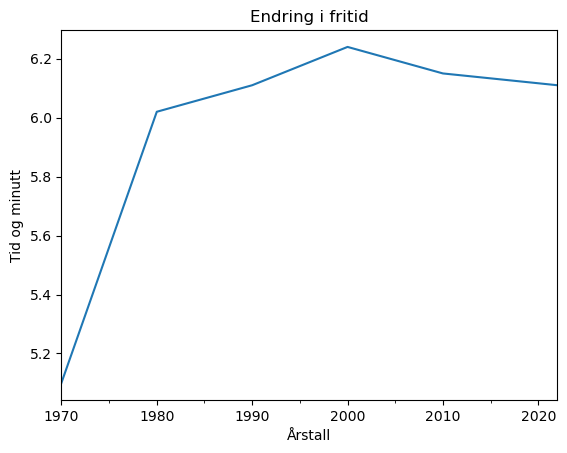

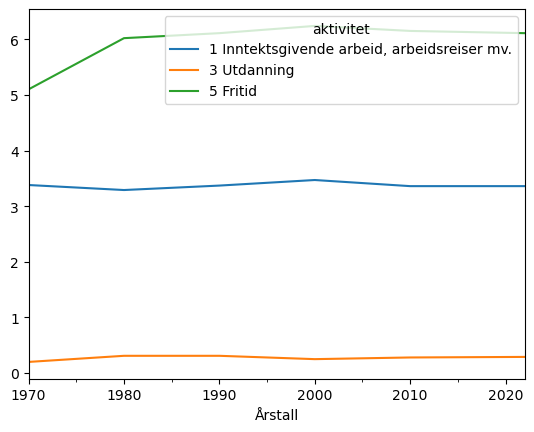

In [98]:
import seaborn as sns

#Plot kun tid brukt til fritidsaktiviteter 1970->
dft.loc[("5 Fritid", "Tid brukt, blant alle (timer og minutter)")].plot()
plt.title("Endring i fritid")
plt.ylabel("Tid og minutt")

#Ta en cross-section, tid brukt til alle aktivteter
df_tmp = dft.xs("Tid brukt, blant alle (timer og minutter)", level="statistikkvariabel")
#Bikk tabellen "90 grader" (Transponer) med .T for å få tid som x-akse(indeks) og plot utvikling
df_tmp.T.plot()

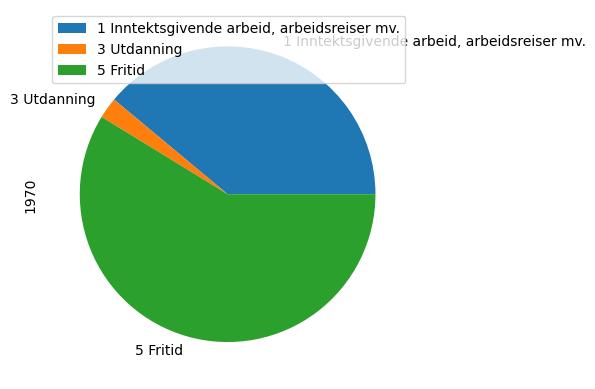

<Axes: ylabel='2022'>

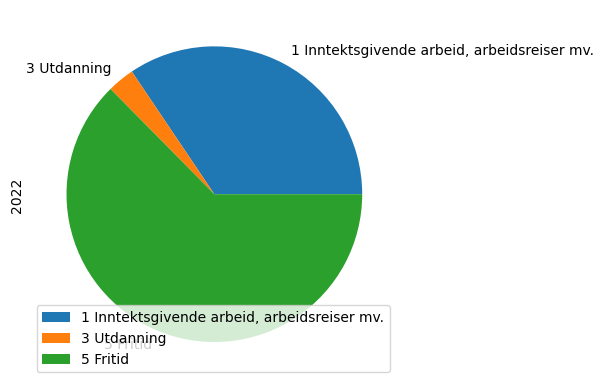

In [105]:
df_tmp.plot.pie(y="1970")
plt.show()
df_tmp.plot.pie(y="2022")